***
Title     : `00-explore.ipynb`<br>
Author    : Paul Covert<br>
Date      : 2025-02-15<br>
Version   : 1.0.0<br>
URL       : <br>
Aim       : Jupyter notebook for exploration of environmental data.  Use `00-main.py` for production calculations and visualization.
***

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import adcp
import tcm

In [4]:
# Define root data path
DATA_RAW = Path("../data")

In [42]:
# Set the time slices for environmental variables
ANSE_DES_PILOTES_SLICE = slice(
    pd.to_datetime("2022-07-29T00:00:00"), 
    pd.to_datetime("2022-11-06T16:00:00")
)
LA_BALEINE_SLICE = slice(
    pd.to_datetime("2022-07-29T00:00:00"),
    pd.to_datetime("2022-11-06T17:30:00")
)
ILE_AUX_LIEVRES_1_SLICE = slice(
    pd.to_datetime("2022-06-01T00:00:00"),
    pd.to_datetime("2022-11-08T17:30:00")
)
ILE_AUX_LIEVRES_2_SLICE = slice(
    pd.to_datetime("2022-06-01T00:00:00"),
    pd.to_datetime("2022-11-08T16:30:00")
)

Text(0, 0.5, 'Current altitude / m')

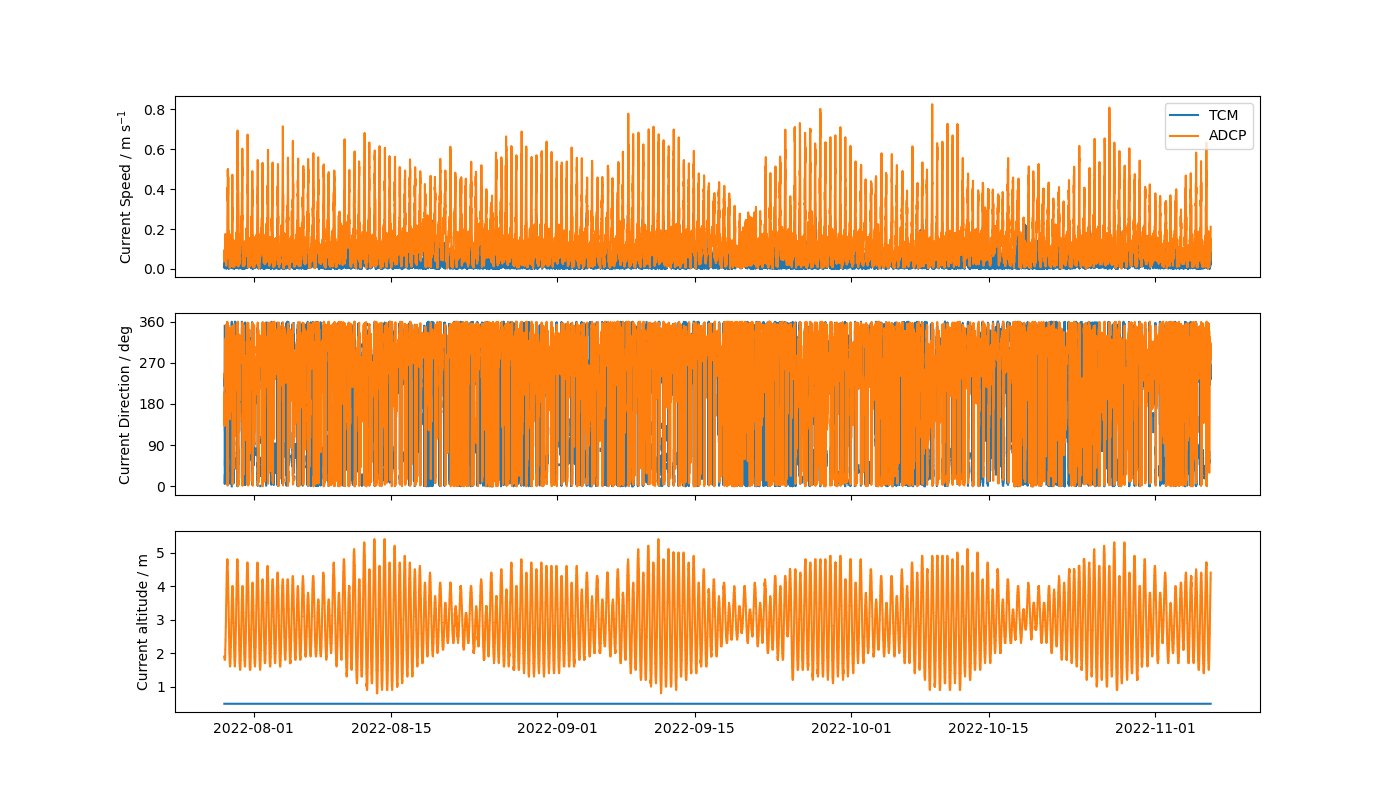

In [60]:
# Plot speed and direction at Anse des Pilotes

%matplotlib widget
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 8))

# Open load data
df_tcm = tcm.read_csv(tcm.paths.get("anse_des_pilotes", root=DATA_RAW))
ds_adcp = adcp.open_dataset(adcp.paths.get("anse_des_pilotes", root=DATA_RAW))

# Estimate adcp altitude, assuming transducer is ~0.5m above bottom
ds_adcp["altitude"] = (ds_adcp["xducer_depth"] + 0.5) - np.max(ds_adcp["depth"])

# Estimate tcm altitude of ~0.5m above bottom
df_tcm["altitude"] = 0.5

# Select deepest adcp current measurement
ds_adcp = ds_adcp.sel(depth=np.max(ds_adcp["depth"]))
ds_adcp = ds_adcp.dropna("time")
df_adcp = ds_adcp.to_pandas()

# Trim TCM and ADCP
df_adcp = df_adcp.loc[ANSE_DES_PILOTES_SLICE]
df_tcm = df_tcm.loc[ANSE_DES_PILOTES_SLICE]

# Create plots
ax[0].plot(df_tcm["speed"], label="TCM")
ax[0].plot(df_adcp["speed"], label="ADCP")
ax[0].legend()
ax[0].set_ylabel(r"Current Speed / m s$^{-1}$")
ax[1].plot(df_tcm["dir"].where(df_tcm["speed"]>=0.02))
ax[1].plot(df_adcp["dir"])
ax[1].set_yticks([0, 90, 180, 270, 360])
ax[1].set_ylabel("Current Direction / deg")
ax[2].plot(df_tcm["altitude"])
ax[2].plot(df_adcp["altitude"])
ax[2].set_ylabel("Current altitude / m")


Text(0, 0.5, 'Current altitude / m')

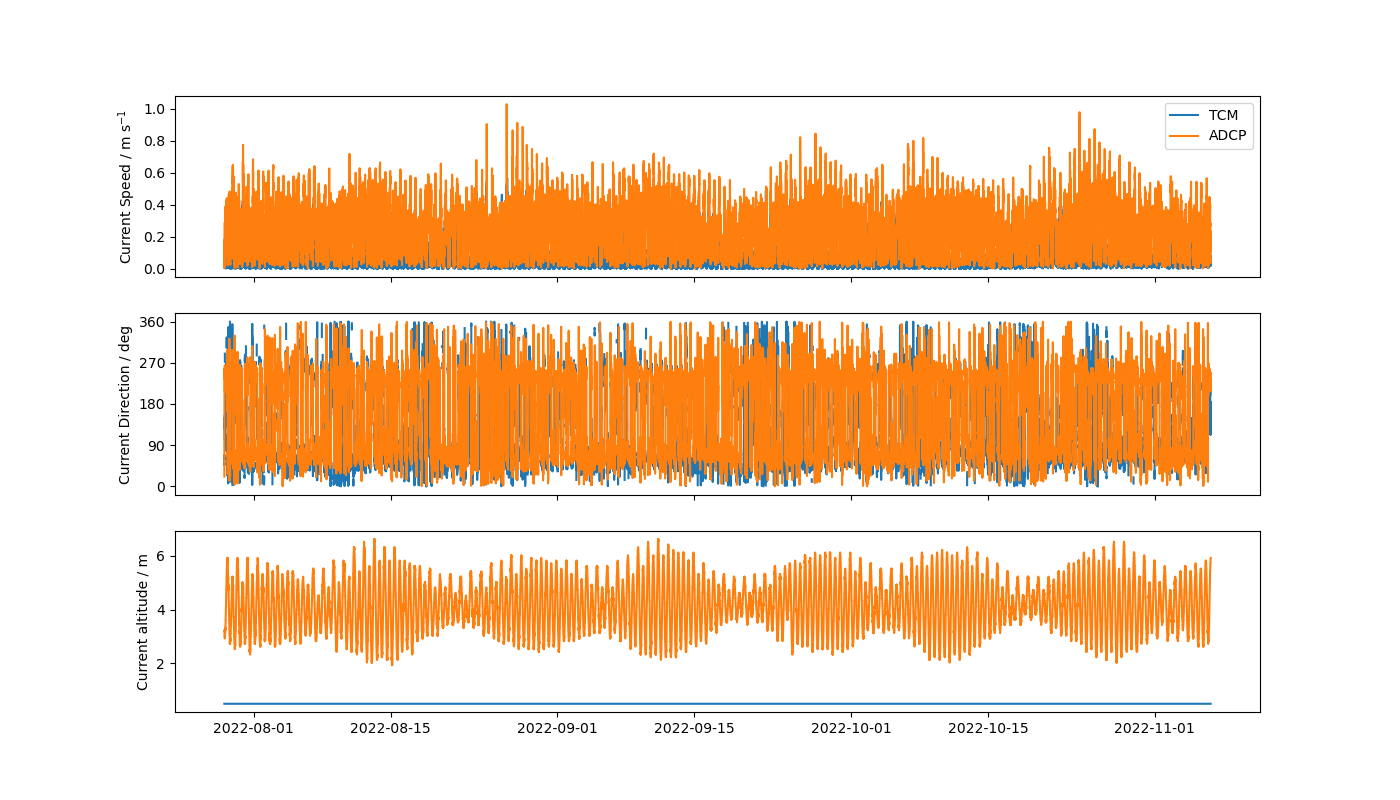

In [61]:
# Plot speed and direction at La Baleine

%matplotlib widget
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 8))

# Open load data
df_tcm = tcm.read_csv(tcm.paths.get("la_baleine", root=DATA_RAW))
ds_adcp = adcp.open_dataset(adcp.paths.get("la_baleine", root=DATA_RAW))

# Estimate adcp altitude, assuming transducer is ~0.5m above bottom
ds_adcp["altitude"] = (ds_adcp["xducer_depth"] + 0.5) - np.max(ds_adcp["depth"])

# Estimate tcm altitude of ~0.5m above bottom
df_tcm["altitude"] = 0.5

# Select deepest adcp current measurement
ds_adcp = ds_adcp.sel(depth=np.max(ds_adcp["depth"]))
ds_adcp = ds_adcp.dropna("time")
df_adcp = ds_adcp.to_pandas()

# Trim TCM and ADCP
df_adcp = df_adcp.loc[LA_BALEINE_SLICE]
df_tcm = df_tcm.loc[LA_BALEINE_SLICE]

# Create plots
ax[0].plot(df_tcm["speed"], label="TCM")
ax[0].plot(df_adcp["speed"], label="ADCP")
ax[0].legend()
ax[0].set_ylabel(r"Current Speed / m s$^{-1}$")
ax[1].plot(df_tcm["dir"].where(df_tcm["speed"]>=0.02))
ax[1].plot(df_adcp["dir"])
ax[1].set_yticks([0, 90, 180, 270, 360])
ax[1].set_ylabel("Current Direction / deg")
ax[2].plot(df_tcm["altitude"])
ax[2].plot(df_adcp["altitude"])
ax[2].set_ylabel("Current altitude / m")

Text(0, 0.5, 'Current altitude / m')

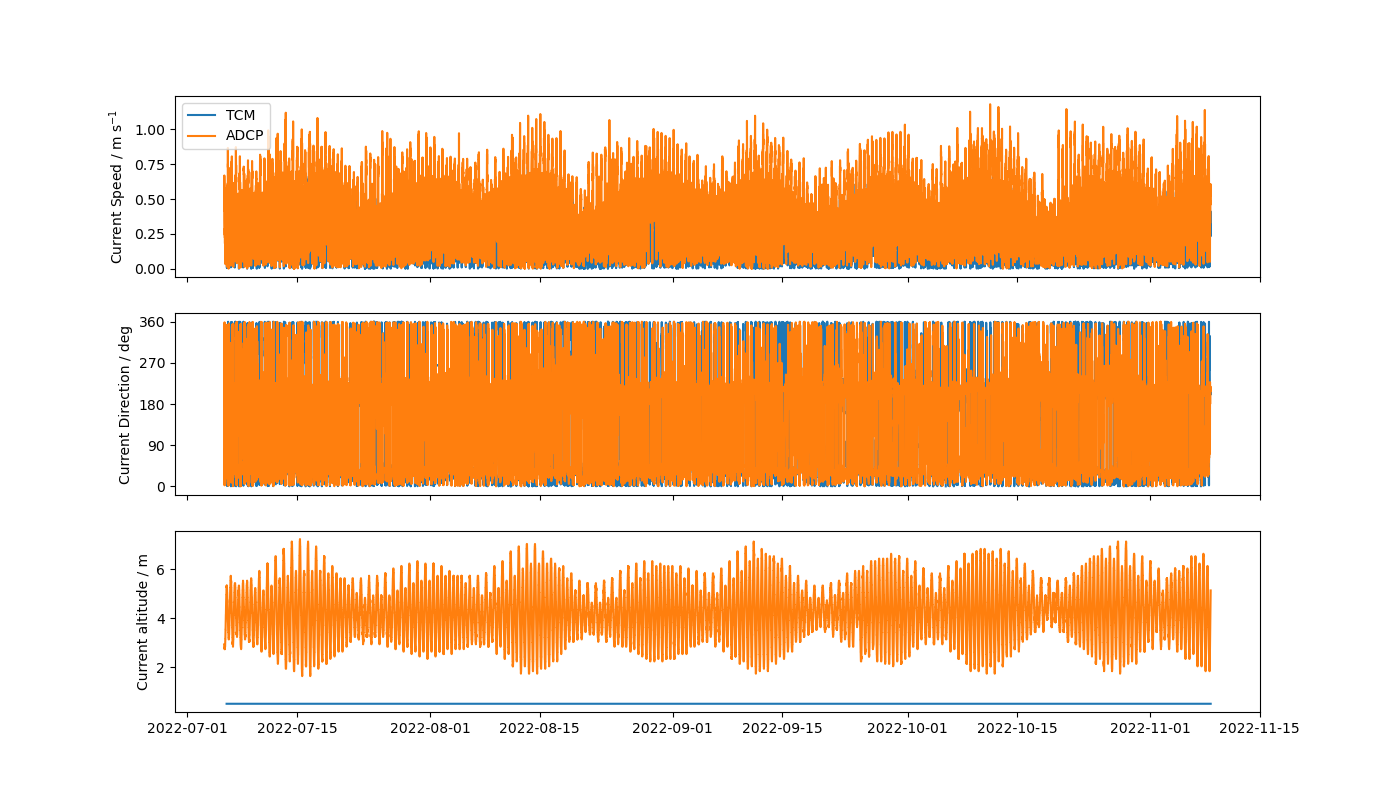

In [62]:
# Plot speed and direction at Ile aux Lievres 1

%matplotlib widget
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 8))

# Open load data
df_tcm = tcm.read_csv(tcm.paths.get("ile_aux_lievres_1", root=DATA_RAW))
ds_adcp = adcp.open_dataset(adcp.paths.get("ile_aux_lievres_1", root=DATA_RAW))

# Estimate adcp altitude, assuming transducer is ~0.5m above bottom
ds_adcp["altitude"] = (ds_adcp["xducer_depth"] + 0.5) - np.max(ds_adcp["depth"])

# Estimate tcm altitude of ~0.5m above bottom
df_tcm["altitude"] = 0.5

# Select deepest adcp current measurement
ds_adcp = ds_adcp.sel(depth=np.max(ds_adcp["depth"]))
ds_adcp = ds_adcp.dropna("time")
df_adcp = ds_adcp.to_pandas()

# Trim TCM and ADCP
df_adcp = df_adcp.loc[ILE_AUX_LIEVRES_1_SLICE]
df_tcm = df_tcm.loc[ILE_AUX_LIEVRES_1_SLICE]

# Create plots
ax[0].plot(df_tcm["speed"], label="TCM")
ax[0].plot(df_adcp["speed"], label="ADCP")
ax[0].legend()
ax[0].set_ylabel(r"Current Speed / m s$^{-1}$")
ax[1].plot(df_tcm["dir"].where(df_tcm["speed"]>=0.02))
ax[1].plot(df_adcp["dir"])
ax[1].set_yticks([0, 90, 180, 270, 360])
ax[1].set_ylabel("Current Direction / deg")
ax[2].plot(df_tcm["altitude"])
ax[2].plot(df_adcp["altitude"])
ax[2].set_ylabel("Current altitude / m")

Text(0, 0.5, 'Current altitude / m')

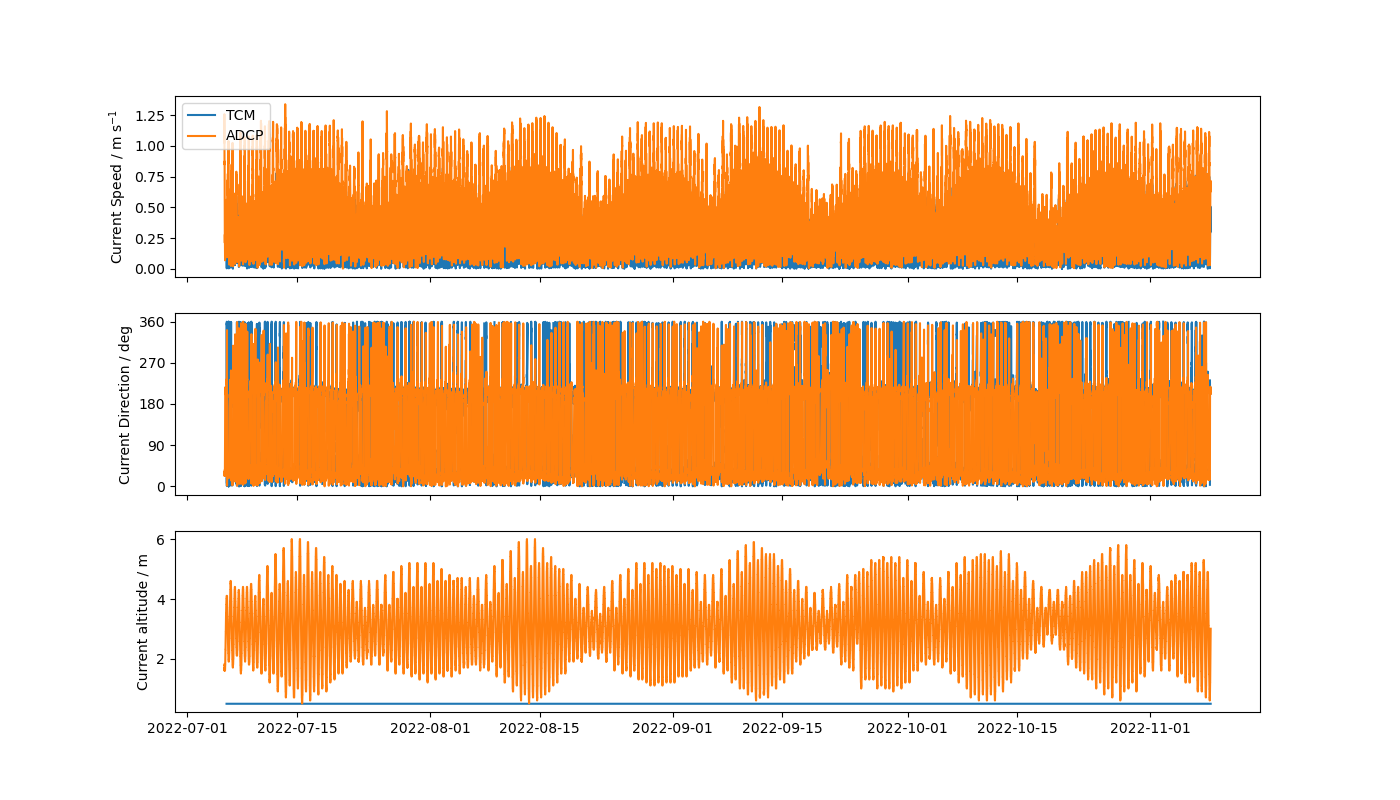

In [63]:
# Plot speed and direction at Ile aux Lievres 2

%matplotlib widget
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 8))

# Open load data
df_tcm = tcm.read_csv(tcm.paths.get("ile_aux_lievres_2", root=DATA_RAW))
ds_adcp = adcp.open_dataset(adcp.paths.get("ile_aux_lievres_2", root=DATA_RAW))

# Estimate adcp altitude, assuming transducer is ~0.5m above bottom
ds_adcp["altitude"] = (ds_adcp["xducer_depth"] + 0.5) - np.max(ds_adcp["depth"])

# Estimate tcm altitude of ~0.5m above bottom
df_tcm["altitude"] = 0.5

# Select deepest adcp current measurement
ds_adcp = ds_adcp.sel(depth=np.max(ds_adcp["depth"]))
ds_adcp = ds_adcp.dropna("time")
df_adcp = ds_adcp.to_pandas()

# Trim TCM and ADCP
df_adcp = df_adcp.loc[ILE_AUX_LIEVRES_2_SLICE]
df_tcm = df_tcm.loc[ILE_AUX_LIEVRES_2_SLICE]

# Create plots
ax[0].plot(df_tcm["speed"], label="TCM")
ax[0].plot(df_adcp["speed"], label="ADCP")
ax[0].legend()
ax[0].set_ylabel(r"Current Speed / m s$^{-1}$")
ax[1].plot(df_tcm["dir"].where(df_tcm["speed"]>=0.02))
ax[1].plot(df_adcp["dir"])
ax[1].set_yticks([0, 90, 180, 270, 360])
ax[1].set_ylabel("Current Direction / deg")
ax[2].plot(df_tcm["altitude"])
ax[2].plot(df_adcp["altitude"])
ax[2].set_ylabel("Current altitude / m")